In [1]:
# Importamos librerias

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.python.client import device_lib
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
np.random.seed(7)


In [2]:
print("Versión de tensorflow:{}".format(tf.__version__))
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

Versión de tensorflow:2.11.0
['/device:CPU:0']


# TRATAMIENTO DE DATOS

In [3]:
df=pd.read_csv("airbnb-listings-extract.csv", sep=";",header="infer")

df.head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."


# Limpieza del Dataset

In [4]:
# Eliminacion de variables irevelerantes (Id, Listin Url,..)
# Relleno de los valores Nan con la media
# Codificacion de las variabkes categoricas
#etc



df = df.drop(df.columns[df.columns.str.contains("Listing Url")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("Medium Url")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("Picture Url")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("PXL Picture Url")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("Host URL")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("Host Thumbnail Url")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("Host Picture Url")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("URL")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("ID")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("Scraped")], axis=1)
columnas_eliminadas=['Host Name','Name','Summary','Space','Description','Neighborhood Overview','Host About','Notes',
                     'Transit','Access','Interaction','House Rules','Features','Square Feet','Has Availability','Weekly Price','Monthly Price','Security Deposit']
df = df.drop(columnas_eliminadas, axis=1)

df.drop(columns='Availability 30',inplace=True,axis=1)
df.drop(columns='Availability 60',inplace=True,axis=1)
df.drop(columns='Availability 90',inplace=True,axis=1)
df.drop(columns='Smart Location',inplace=True,axis=1)
df.drop(columns='Host Total Listings Count',inplace=True,axis=1)
df.drop(columns='Calculated host listings count',inplace=True,axis=1)


# eliminos variables categoricas que contienen demasiados elementos para ser categorizadas.

df.drop(columns=['Host Location'], axis=1, inplace=True)
df.drop(columns=['Host Verifications'], axis=1, inplace=True)
df.drop(columns=['Host Neighbourhood'], axis=1, inplace=True)
df.drop(columns=['Neighbourhood Cleansed'], axis=1, inplace=True)
df.drop(columns=['Neighbourhood Group Cleansed'], axis=1, inplace=True)
df.drop(columns=['Amenities'], axis=1, inplace=True)
df.drop(columns=['Street'], axis=1, inplace=True)
df = df[df['City']=='Madrid']

#Codificion de las variables categoricas
    
EO= LabelEncoder()
HS= LabelEncoder() 
HRT= LabelEncoder()
HAR= LabelEncoder()
S= LabelEncoder() 
N= LabelEncoder() 
C= LabelEncoder()
Zp= LabelEncoder()
M= LabelEncoder() 
CC= LabelEncoder() 
Co= LabelEncoder()
PT= LabelEncoder() 
RT= LabelEncoder()
BT= LabelEncoder()
CU= LabelEncoder()
FR= LabelEncoder()
LR= LabelEncoder()
Li= LabelEncoder()
JN= LabelEncoder() 
CP= LabelEncoder() 
Ge= LabelEncoder()
St= LabelEncoder()


def codificacionColumnas(df):
    #df['Experiences Offered'] = EO.fit_transform(df['Experiences Offered'])
    df['Host Since'] = HS.fit_transform(df['Host Since'])
    df['Host Response Time'] = HRT.fit_transform(df['Host Response Time'])
    df['Host Acceptance Rate'] = HAR.fit_transform(df['Host Acceptance Rate'])
    df['Neighbourhood'] = N.fit_transform(df['Neighbourhood'])
    df['City'] = C.fit_transform(df['City'])
    df['State'] = St.fit_transform(df['State'])
    df['Market'] = M.fit_transform(df['Market'])
    df['Country Code'] = CC.fit_transform(df['Country Code'])
    df['Country'] = Co.fit_transform(df['Country'])
    df['Property Type'] = PT.fit_transform(df['Property Type'])
    df['Room Type'] = RT.fit_transform(df['Room Type'])
    df['Bed Type'] = BT.fit_transform(df['Bed Type'])
    df['Calendar Updated'] = CU.fit_transform(df['Calendar Updated'])
    df['First Review'] = FR.fit_transform(df['First Review'])
    df['Last Review'] = LR.fit_transform(df['Last Review'])
    df['License'] = Li.fit_transform(df['License'])
    df['Jurisdiction Names'] = JN.fit_transform(df['Jurisdiction Names'])
    df['Cancellation Policy'] = CP.fit_transform(df['Cancellation Policy'])
    df['Geolocation'] = Ge.fit_transform(df['Geolocation'])
    
codificacionColumnas(df)

df['Zipcode'] = pd.to_numeric(df['Zipcode'], errors='coerce').convert_dtypes() 
# Compruebo si hay 'NA'  --> df.isna().sum() --> Borro Na
df.dropna(subset='Zipcode',inplace=True,axis=0)

# Tratamos los valores Null rellenandolos con su media.
mediahrr=np.mean(df['Host Response Rate'])
df['Host Response Rate'].fillna(value=mediahrr,inplace=True)
mediahlc=np.mean(df['Host Listings Count'])
df['Host Listings Count'].fillna(value=mediahlc,inplace=True)
mediab=np.mean(df['Bathrooms'])
df['Bathrooms'].fillna(value=mediab,inplace=True)
mediabe=np.mean(df['Bedrooms'])
df['Bedrooms'].fillna(value=mediabe,inplace=True)
mediabed=np.mean(df['Beds'])
df['Beds'].fillna(value=mediabed,inplace=True)
mediap=np.mean(df['Price'])
df['Price'].fillna(value=mediap,inplace=True)
mediarsr=np.mean(df['Review Scores Rating'])
df['Review Scores Rating'].fillna(value=mediarsr,inplace=True)
mediarsa=np.mean(df['Review Scores Accuracy'])
df['Review Scores Accuracy'].fillna(value=mediarsa,inplace=True)
mediarsc=np.mean(df['Review Scores Cleanliness'])
df['Review Scores Cleanliness'].fillna(value=mediarsc,inplace=True)
mediarsc2=np.mean(df['Review Scores Checkin'])
df['Review Scores Checkin'].fillna(value=mediarsc2,inplace=True)
mediarsc3=np.mean(df['Review Scores Communication'])
df['Review Scores Communication'].fillna(value=mediarsc3,inplace=True)
mediascl=np.mean(df['Review Scores Location'])
df['Review Scores Location'].fillna(value=mediascl,inplace=True)
mediarsv=np.mean(df['Review Scores Value'])
df['Review Scores Value'].fillna(value=mediarsv,inplace=True)
mediarpm=np.mean(df['Reviews per Month'])
df['Reviews per Month'].fillna(value=mediarpm,inplace=True)
mediacf=np.mean(df['Cleaning Fee'])
df['Cleaning Fee'].fillna(value=mediarpm,inplace=True)
nulos=df['Thumbnail Url']
df = df.dropna()







In [5]:
df.isna().sum()

Experiences Offered            0
Thumbnail Url                  0
Host Since                     0
Host Response Time             0
Host Response Rate             0
Host Acceptance Rate           0
Host Listings Count            0
Neighbourhood                  0
City                           0
State                          0
Zipcode                        0
Market                         0
Country Code                   0
Country                        0
Latitude                       0
Longitude                      0
Property Type                  0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Price                          0
Cleaning Fee                   0
Guests Included                0
Extra People                   0
Minimum Nights                 0
Maximum Nights                 0
Calendar Updated               0
Availabili

In [6]:
# Seleccion de las mejores caracteristicas: Despues de estudiar la correlacion, la inexistencia de colinealidad entre variables, y seleccionar las
# predictores con una regularizacion Lasso Nos quedamos con los mejores:

df=df[['Thumbnail Url','Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Room Type','Cleaning Fee','Guests Included','Price']]

df.info()

#Guardamos el dataset limpio
df.to_csv('df_limpio.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10352 entries, 40 to 14757
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Thumbnail Url    10352 non-null  object 
 1   Accommodates     10352 non-null  int64  
 2   Bathrooms        10352 non-null  float64
 3   Bedrooms         10352 non-null  float64
 4   Beds             10352 non-null  float64
 5   Room Type        10352 non-null  int32  
 6   Cleaning Fee     10352 non-null  float64
 7   Guests Included  10352 non-null  int64  
 8   Price            10352 non-null  float64
dtypes: float64(5), int32(1), int64(2), object(1)
memory usage: 768.3+ KB


# CARGA DE LOS DATOS

In [7]:
import imageio as io
import imageio.v2 as io
import numpy as np
import cv2
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = df['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass
    except ValueError as err:          # COLOQUE qui una excepcion por valueerror porque al llegar a 800 imagenes saltaba el error
        pass
print("Dscarga terminada")

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 3 descargada
3
Imagen 4 descargada
4
Imagen 5 descargada
5
Imagen 6 descargada
6
Imagen 7 descargada
7
Imagen 8 descargada
8
Imagen 10 descargada
9
Imagen 12 descargada
10
Imagen 13 descargada
11
Imagen 14 descargada
12
Imagen 15 descargada
13
Imagen 16 descargada
14
Imagen 17 descargada
15
Imagen 18 descargada
16
Imagen 19 descargada
17
Imagen 20 descargada
18
Imagen 21 descargada
19
Imagen 22 descargada
20
Imagen 23 descargada
21
Imagen 24 descargada
22
Imagen 26 descargada
23
Imagen 28 descargada
24
Imagen 29 descargada
25
Imagen 31 descargada
26
Imagen 34 descargada
27
Imagen 35 descargada
28
Imagen 37 descargada
29
Imagen 38 descargada
30
Imagen 39 descargada
31
Imagen 40 descargada
32
Imagen 41 descargada
33
Imagen 42 descargada
34
Imagen 43 descargada
35
Imagen 46 descargada
36
Imagen 47 descargada
37
Imagen 48 descargada
38
Imagen 49 descargada
39
Imagen 50 descargada
40
Imagen 51 descargada
41
Imagen 52 descargada
42
Imagen 53

Imagen 434 descargada
325
Imagen 435 descargada
326
Imagen 436 descargada
327
Imagen 437 descargada
328
Imagen 438 descargada
329
Imagen 440 descargada
330
Imagen 441 descargada
331
Imagen 442 descargada
332
Imagen 443 descargada
333
Imagen 446 descargada
334
Imagen 447 descargada
335
Imagen 448 descargada
336
Imagen 449 descargada
337
Imagen 451 descargada
338
Imagen 452 descargada
339
Imagen 454 descargada
340
Imagen 457 descargada
341
Imagen 458 descargada
342
Imagen 459 descargada
343
Imagen 461 descargada
344
Imagen 463 descargada
345
Imagen 464 descargada
346
Imagen 465 descargada
347
Imagen 466 descargada
348
Imagen 467 descargada
349
Imagen 468 descargada
350
Imagen 469 descargada
351
Imagen 470 descargada
352
Imagen 472 descargada
353
Imagen 473 descargada
354
Imagen 476 descargada
355
Imagen 477 descargada
356
Imagen 478 descargada
357
Imagen 479 descargada
358
Imagen 480 descargada
359
Imagen 482 descargada
360
Imagen 483 descargada
361
Imagen 484 descargada
362
Imagen 485 d

Imagen 837 descargada
641
Imagen 838 descargada
642
Imagen 839 descargada
643
Imagen 841 descargada
644
Imagen 842 descargada
645
Imagen 843 descargada
646
Imagen 844 descargada
647
Imagen 845 descargada
648
Imagen 846 descargada
649
Imagen 847 descargada
650
Imagen 848 descargada
651
Imagen 850 descargada
652
Imagen 851 descargada
653
Imagen 852 descargada
654
Imagen 853 descargada
655
Imagen 854 descargada
656
Imagen 856 descargada
657
Imagen 857 descargada
658
Imagen 858 descargada
659
Imagen 860 descargada
660
Imagen 861 descargada
661
Imagen 865 descargada
662
Imagen 866 descargada
663
Imagen 867 descargada
664
Imagen 868 descargada
665
Imagen 870 descargada
666
Imagen 871 descargada
667
Imagen 872 descargada
668
Imagen 873 descargada
669
Imagen 875 descargada
670
Imagen 876 descargada
671
Imagen 877 descargada
672
Imagen 879 descargada
673
Imagen 882 descargada
674
Imagen 883 descargada
675
Imagen 886 descargada
676
Imagen 887 descargada
677
Imagen 889 descargada
678
Imagen 891 d

Imagen 1210 descargada
950
Imagen 1211 descargada
951
Imagen 1212 descargada
952
Imagen 1213 descargada
953
Imagen 1214 descargada
954
Imagen 1215 descargada
955
Imagen 1216 descargada
956
Imagen 1217 descargada
957
Imagen 1218 descargada
958
Imagen 1219 descargada
959
Imagen 1220 descargada
960
Imagen 1221 descargada
961
Imagen 1222 descargada
962
Imagen 1224 descargada
963
Imagen 1225 descargada
964
Imagen 1226 descargada
965
Imagen 1227 descargada
966
Imagen 1228 descargada
967
Imagen 1233 descargada
968
Imagen 1234 descargada
969
Imagen 1235 descargada
970
Imagen 1236 descargada
971
Imagen 1237 descargada
972
Imagen 1238 descargada
973
Imagen 1239 descargada
974
Imagen 1242 descargada
975
Imagen 1243 descargada
976
Imagen 1244 descargada
977
Imagen 1245 descargada
978
Imagen 1246 descargada
979
Imagen 1247 descargada
980
Imagen 1249 descargada
981
Imagen 1251 descargada
982
Imagen 1252 descargada
983
Imagen 1254 descargada
984
Imagen 1255 descargada
985
Imagen 1256 descargada
986
I

In [8]:
# Visualizamos las imágenes cargadas
print(images.shape)

# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = df.iloc[good_urls, :]


(1000, 224, 224, 3)


In [9]:
# guardamos las imágenes 
np.save('images.npy', images)
np.save('final_data.npy', final_data)
final_data.to_csv('df_limpio_2.csv', sep=';')

In [92]:
df=pd.read_csv("df_limpio_2.csv", sep=";")

#final_data=np.load("final_data.npy", allow_pickle=True)
#images=np.load('images.npy', allow_pickle=True)
Y=df['Price'].values       # Labes
X=df.iloc[:,2:9].values     # Variables predictoras

# 1-. Red neuronal Regresion Lineal Con variables numericas y categoricas

In [93]:
# Imports necesarios
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import Adam

import matplotlib.pyplot as plt


seed = 7
np.random.seed(seed)

#Division train,test,validacion

x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=42,shuffle=True,)
x_train,x_val,y_train,y_val=train_test_split(x_train, y_train, test_size=0.15,random_state=42,shuffle=True,)


# centralizacion y normalizacion con los datos de train

'''Media_x= np.mean(x_train, axis = 0)
sd_x=np.std(x_train, axis = 0)

def norm(datos):
   
    datos=(datos-Media_x)/sd_x
    return datos


x_train=norm(x_train)
x_test=norm(x_test)
x_val=norm(x_val) 

# Normalizamos entr 0 y 1 la variable respuestas.

valor_maximo=max(df["Price"])
y_train=y_train/valor_maximo
y_val=y_val/valor_maximo
y_test=y_test/valor_maximo

'''
print(x_train.shape,x_train.dtype)
print(y_train.shape,y_train.dtype)
print(x_test.shape,x_test.dtype)
print(y_test.shape,y_test.dtype)
print(x_val.shape,x_val.dtype)
print(y_val.shape,y_val.dtype)

(595, 7) float64
(595,) float64
(300, 7) float64
(300,) float64
(105, 7) float64
(105,) float64


In [94]:
y_train=y_train.reshape(-1, 1)
y_val=y_val.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
XScalerFit=MinMaxScaler()
yScalerFit=MinMaxScaler()
 
# Storing the fit object for later reference
XScalerFit=XScalerFit.fit(x_train)
yScalerFit=yScalerFit.fit(y_train)
 
# Generating the standardized values of X and y
X_train=XScalerFit.transform(x_train)
y_train=yScalerFit.transform(y_train)
X_val=XScalerFit.transform(x_val)
y_val=yScalerFit.transform(y_val)

print(f'Y_train está ahora entre : {max(y_train)} y {min(y_train)}')


Y_train está ahora entre : [1.] y [0.]


In [43]:
#Creamos el modelo

def modelo_variables_numericas():
    output_dim=1
    model= keras.Sequential([
        
        Dense(output_dim,input_dim=(7) ,activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1,activation='sigmoid') ]) 
     
    
    adam=Adam(learning_rate=0.001, decay=1e-4)
    model.compile(loss='binary_crossentropy',  optimizer=adam)
    return model
                                        
# Compilacion del modelo y entrenamiento

num_epochs = 30
batch_size =10

modelo_1= modelo_variables_numericas()
H=modelo_1.fit(x_train,y_train,epochs=num_epochs,validation_data=(x_val, y_val),batch_size=batch_size)                                     

Epoch 1/30
60/60 [==============================] - 1s 5ms/step - loss: 0.4255 - val_loss: 0.3357
Epoch 2/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2933 - val_loss: 0.2993
Epoch 3/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2696 - val_loss: 0.2946
Epoch 4/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2626 - val_loss: 0.2932
Epoch 5/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2598 - val_loss: 0.2922
Epoch 6/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2582 - val_loss: 0.2896
Epoch 7/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2562 - val_loss: 0.2910
Epoch 8/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2552 - val_loss: 0.2881
Epoch 9/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2545 - val_loss: 0.2867
Epoch 10/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2546 - val_loss: 0.2878
Epoch 11/30
60/60 [

[INFO]: Evaluando red neuronal...
30/30 [==============================] - 0s 2ms/step


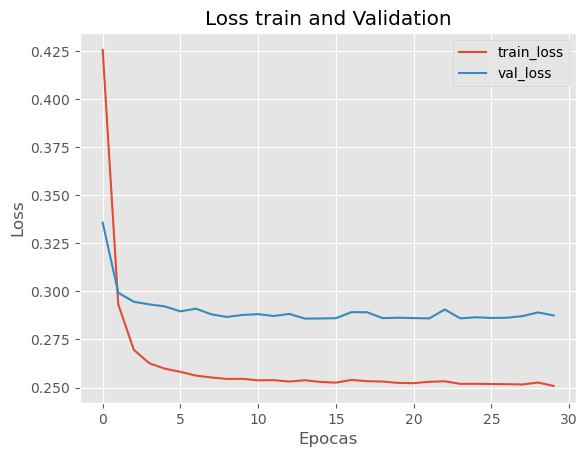

In [44]:
# Evaluando el modelo:

print("[INFO]: Evaluando red neuronal...")
predictions = modelo_1.predict(x_test, batch_size=batch_size)  #(X)


# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")


plt.title("Loss train and Validation")
plt.xlabel("Epocas")
plt.ylabel("Loss")
plt.legend()

In [46]:
# Predicción con validation
y_predval=modelo_1.predict(x_val)
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_predval_original=yScalerFit.inverse_transform(y_predval)

TestingData_norm=pd.DataFrame()
TestingData_norm['Precio Original']=pd.DataFrame(y_val)
TestingData_norm['Precio Estimado']=pd.DataFrame(y_predval)
 
TestingData=pd.DataFrame()
TestingData['Precio Original']=pd.DataFrame(y_val_original)
TestingData['Precio Estimado']=pd.DataFrame(y_predval_original)
TestingData.head()

4/4 [==============================] - 0s 2ms/step


,Precio Original,Precio Estimado
0,55.0,33.204376
1,25.0,33.055759
2,220.0,101.388962
3,97.0,108.300873
4,44.0,59.693592


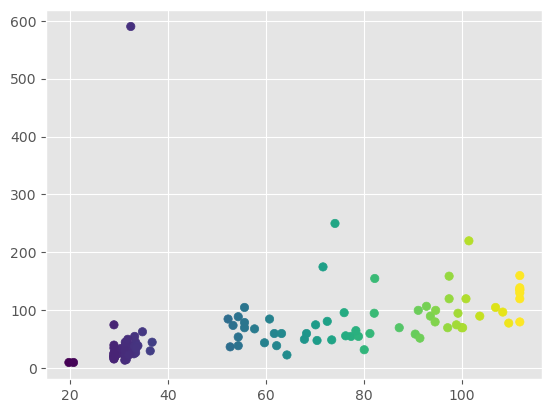

In [47]:
plt.scatter(y_predval_original,y_val_original, c=y_predval_original)

In [57]:
# Error cuadratico

def rmse (actual, pred):
    actual, pred = np.array (actual), np.array (pred)
    return np.sqrt (np.square (np.subtract (actual, pred)). mean ())

error=rmse(y_val_original,y_predval_original)

print('Error cuadratico Medio: ', error)

Error cuadratico Medio:  62.68760682441726


In [63]:
# guardamos el modelo entrenado

modelo_1.save('modelo.h5')

# 2-. RED CNN

In [49]:
# Visualizamos las imágenes cargadas
images=np.load('images.npy', allow_pickle=True)
#images=images.astype(np.float64)
print(images.shape)


(1000, 224, 224, 3)


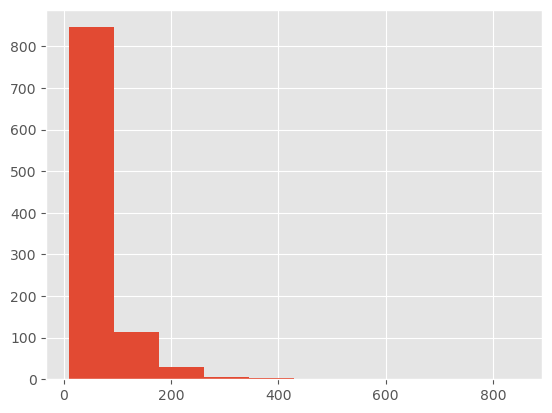

In [53]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(Y, bins=10)
plt.show()

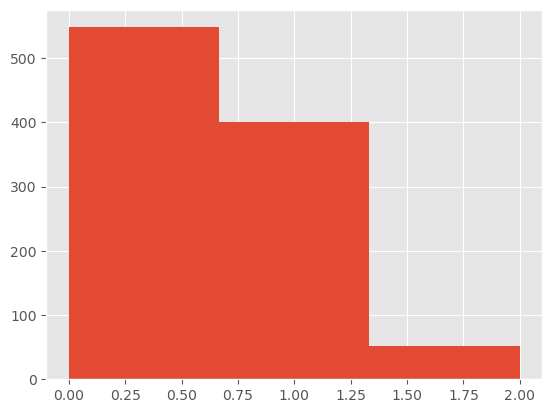

In [54]:
y_class = []
for x in Y:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=150:
        y_class.append(1)
    else:
        y_class.append(2)
        
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_class, bins=3)
plt.show()

# Definicion del modelo CNN

In [95]:
# importamos lo necesario
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.constraints import max_norm
from keras.regularizers import l2
import numpy as np

# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)

input_shape = (48, 48, 3)



# Normalizamos las imagenes

# resize train set
X_train_resized = []
for img in x_tr:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)


# resize test set
X_val_resized = []
for img in x_va:
  X_val_resized.append(np.resize(img, input_shape) / 255)

X_val_resized = np.array(X_val_resized)
print(X_val_resized.shape)

# resize test set
X_test_resized = []
for img in x_te:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(595, 48, 48, 3)
(105, 48, 48, 3)
(300, 48, 48, 3)


In [90]:
from tensorflow.keras.applications import VGG16


# creamos el modelo base

from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

def modelo_cnn():
    
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    for layer in base_model.layers:
        if layer.name == 'block5_conv1':
            break
        layer.trainable = False
        print('Capa ' + layer.name + ' congelada')
    
    # cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
    last = base_model.layers[-1].output
    x = GlobalAveragePooling2D(name="avg_pool")(last)
    x= Dense(1024,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5))(x)
    x =Dense(512, activation='relu', name='fc1')(x)
    x = Dropout(0.3)(x)
    x = Dense(1, name='predictions')(x)
    model = Model(base_model.input, x)

    
    # # compilamos el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
    return model

    




In [99]:
# comenzamos con el entrenamiento

modelo_2=modelo_cnn()
epochs = 7
batch_size = 100

# como entrenariamos normalmente
H=modelo_2.fit(X_train_resized, y_train,
          batch_size=batch_size,
          validation_data=(X_val_resized, y_val),
          epochs=epochs)

Capa input_12 congelada
Capa block1_conv1 congelada
Capa block1_conv2 congelada
Capa block1_pool congelada
Capa block2_conv1 congelada
Capa block2_conv2 congelada
Capa block2_pool congelada
Capa block3_conv1 congelada
Capa block3_conv2 congelada
Capa block3_conv3 congelada
Capa block3_pool congelada
Capa block4_conv1 congelada
Capa block4_conv2 congelada
Capa block4_conv3 congelada
Capa block4_pool congelada
Epoch 1/7
6/6 [==============================] - 13s 2s/step - loss: 0.5222 - val_loss: 0.2746
Epoch 2/7
6/6 [==============================] - 13s 2s/step - loss: 0.3126 - val_loss: 0.2409
Epoch 3/7
6/6 [==============================] - 13s 2s/step - loss: 0.2721 - val_loss: 0.2458
Epoch 4/7
6/6 [==============================] - 13s 2s/step - loss: 0.2586 - val_loss: 0.2317
Epoch 5/7
6/6 [==============================] - 13s 2s/step - loss: 0.2381 - val_loss: 0.2294
Epoch 6/7
6/6 [==============================] - 13s 2s/step - loss: 0.2287 - val_loss: 0.2278
Epoch 7/7
6/6 [===

[INFO]: Evaluando red neuronal...
3/3 [==============================] - 4s 1s/step


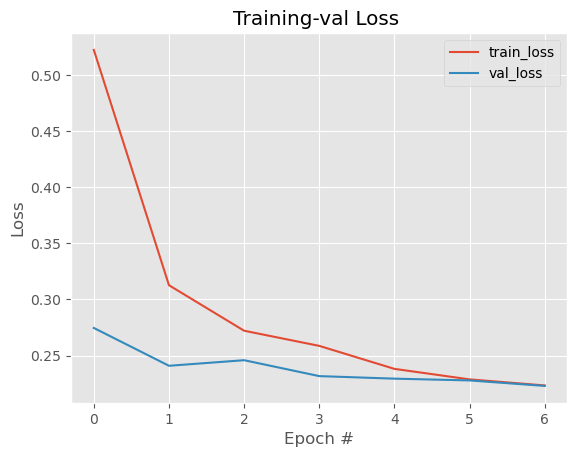

In [100]:
print("[INFO]: Evaluando red neuronal...")
predictions = modelo_2.predict(X_test_resized, batch_size=batch_size) 
    
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")

 
 
plt.title("Training-val Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [104]:
# Error cuadratico

def rmse (actual, pred):
    actual, pred = np.array (actual), np.array (pred)
    return np.sqrt (np.square (np.subtract (actual, pred)). mean ())

error=rmse(y_val_original,y_predval_original)

print('Error cuadratico Medio: ', error)

TypeError: 'float' object is not subscriptable

In [112]:
# Evaluamos el modelo con datos de val
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

# RMSE

rmse = math.sqrt(mean_squared_error(y_im_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

Test Score: 68.42 RMSE


In [111]:
# Predicción con validation de imagenes
y_im_predval=modelo_2.predict(X_val_resized)
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_im_predval_original=yScalerFit.inverse_transform(y_im_predval)


 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_im_predval_original)
TestingData.head()

4/4 [==============================] - 1s 294ms/step


,Price,PredictedPrice
0,55.0,62.868660
1,25.0,69.084061
2,220.0,64.682190
3,97.0,50.310066
4,44.0,73.128960


# 3º MODELO HIBRIDO

In [113]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import  GlobalAveragePooling2D


mlp = modelo_1
cnn = modelo_2

# Creamos la entrada de nuestra red final con las capas de la salida de ambas Redes.

combinedInput = concatenate([mlp.output, cnn.output])

# Nuestra capa final tendra dos capas densa .La de salida sera una sigmoide.

x = Dense(4, activation="relu")(combinedInput)
x= Flatten()(x)
x = Dense(1, activation="sigmoid")(x)

# Al final el modelo acepta las dos Redes neuronales y convierte la salida en un valor simple que es nuestra
# prediccion.

model = Model(inputs=[mlp.input, cnn.input], outputs=x)

In [114]:
# Compilamos el modelo

batch_size=8

#y_test = tf.stack(y_test)
#x_train = tf.stack(x_train)
#X_train_resized = tf.stack(X_train_resized)

adam=Adam(learning_rate=0.001, decay=1e-4)
model.compile(loss='binary_crossentropy',  optimizer=adam)
# train the model
print("[INFO] Entrenando Modelo...")
K=model.fit(
    x=[x_train, X_train_resized], y=y_train,
    validation_data=([x_val, X_val_resized], y_val),
    epochs=10, batch_size=batch_size)


[INFO] Entrenando Modelo...
Epoch 1/10
75/75 [==============================] - 18s 225ms/step - loss: 0.3642 - val_loss: 0.3193
Epoch 2/10
75/75 [==============================] - 17s 226ms/step - loss: 0.2870 - val_loss: 0.3196
Epoch 3/10
75/75 [==============================] - 17s 225ms/step - loss: 0.2796 - val_loss: 0.3045
Epoch 4/10
75/75 [==============================] - 17s 224ms/step - loss: 0.2697 - val_loss: 0.3014
Epoch 5/10
75/75 [==============================] - 17s 225ms/step - loss: 0.2659 - val_loss: 0.2988
Epoch 6/10
75/75 [==============================] - 17s 225ms/step - loss: 0.2620 - val_loss: 0.2961
Epoch 7/10
75/75 [==============================] - 17s 221ms/step - loss: 0.2597 - val_loss: 0.3026
Epoch 8/10
75/75 [==============================] - 16s 217ms/step - loss: 0.2622 - val_loss: 0.2942
Epoch 9/10
75/75 [==============================] - 16s 212ms/step - loss: 0.2575 - val_loss: 0.2947
Epoch 10/10
75/75 [==============================] - 16s 211ms/

In [119]:
# Predicción con validation de imagenes
y_full_predval=model.predict([x_val,X_val_resized])
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_full_predval_original=yScalerFit.inverse_transform(y_full_predval)


 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_full_predval_original)
TestingData.head()

4/4 [==============================] - 1s 292ms/step


,Price,PredictedPrice
0,55.0,54.837116
1,25.0,47.457134
2,220.0,127.061821
3,97.0,101.789688
4,44.0,83.242073


In [120]:
# RSME

rmse = math.sqrt(mean_squared_error(y_full_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

Test Score: 70.13 RMSE
